# UE4 : Entrainement de modèles de reconnaissance d’entités nommées (NER)


### Install package :

In [1]:
pip install tf2crf

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Import libraries :

In [1]:
import json 
import tensorflow as tf
import numpy as np
import pandas as pd
import datasets
from datasets import list_datasets, load_dataset
from tf2crf import CRF, ModelWithCRFLoss, ModelWithCRFLossDSCLoss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Load dataset :

In [2]:
corpusCasM2 = datasets.load_dataset('corpusCasM2')

Found cached dataset corpus_cas_m2 (C:/Users/HaoLE/.cache/huggingface/datasets/corpus_cas_m2/default/1.0.0/1e18a23d323119b28ca96ca83baeaf676e58908f30122e75a54225833f284766)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
corpusCasM2

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 8305
    })
    test: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 2545
    })
    validation: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 2122
    })
})

In [35]:
train = corpusCasM2['train']

test = corpusCasM2['test']

validation = corpusCasM2['validation']


{'id': '647_000', 'tokens': ['En', '1988', ',', 'F.G.', ',', 'un', 'homme', 'de', '58', 'ans', ',', 'tabagique', 'ancien', ',', 'a', 'présenté', 'une', 'hématurie', 'totale', 'en', 'rapport', 'avec', 'une', 'tumeur', 'vésicale', 'unique', ',', 'paraméatique', 'gauche', ',', 'sans', 'anomalie', 'urographique', '.'], 'ner_tags': [12, 0, 12, 12, 12, 12, 12, 12, 0, 1, 12, 4, 5, 12, 12, 12, 12, 4, 5, 12, 12, 12, 12, 4, 5, 5, 5, 5, 5, 12, 12, 4, 5, 12]}
8305


In [36]:
print(train[0])
print(len(train))
print(test[0])
print(len(test))
print(validation[0])
print(len(validation))

{'id': '743_000', 'tokens': ['Nous', 'rapportons', 'l’', 'observation', 'd’', 'un', 'patient', 'de', '38', 'ans', ',', 'sans', 'antécédents', 'pathologiques', 'particuliers', ',', 'ayant', 'consulté', 'pour', 'des', 'lombalgies', 'chroniques', 'associées', 'à', 'de', 'signes', 'obstructifs', 'et', 'irritatifs', 'du', 'bas', 'appareil', 'urinaire', 'et', 'un', 'épisode', 'd’', 'hématurie', ',', 'le', 'tout', 'évoluant', 'depuis', '06', 'mois', '.'], 'ner_tags': [12, 12, 12, 12, 12, 12, 12, 12, 0, 1, 12, 12, 2, 12, 12, 12, 12, 12, 12, 12, 4, 5, 12, 12, 12, 4, 5, 12, 4, 4, 5, 5, 5, 12, 12, 12, 12, 4, 12, 12, 12, 12, 2, 3, 3, 12]}
2545


{'id': '730_000', 'tokens': ['Une', 'jeune', 'femme', 'de', '28', 'ans', 'rencontre', 'un', 'homme', 'de', '41', 'ans', 'dans', 'un', 'club', 'de', 'sport', '.'], 'ner_tags': [12, 12, 12, 12, 0, 1, 12, 12, 12, 12, 0, 1, 12, 12, 12, 12, 12, 12]}
2122


### X_train, X_test, X_val : list of words 

In [7]:
# words tokens dans la variable X
X_train = [ex['tokens'] for ex in train]
    
X_test = [ex['tokens'] for ex in test]

X_val = [ex['tokens'] for ex in validation]


['En', '1988', ',', 'F.G.', ',', 'un', 'homme', 'de', '58', 'ans', ',', 'tabagique', 'ancien', ',', 'a', 'présenté', 'une', 'hématurie', 'totale', 'en', 'rapport', 'avec', 'une', 'tumeur', 'vésicale', 'unique', ',', 'paraméatique', 'gauche', ',', 'sans', 'anomalie', 'urographique', '.']
8305
['Nous', 'rapportons', 'l’', 'observation', 'd’', 'un', 'patient', 'de', '38', 'ans', ',', 'sans', 'antécédents', 'pathologiques', 'particuliers', ',', 'ayant', 'consulté', 'pour', 'des', 'lombalgies', 'chroniques', 'associées', 'à', 'de', 'signes', 'obstructifs', 'et', 'irritatifs', 'du', 'bas', 'appareil', 'urinaire', 'et', 'un', 'épisode', 'd’', 'hématurie', ',', 'le', 'tout', 'évoluant', 'depuis', '06', 'mois', '.']
2545


In [8]:
print(X_val[0])
print(len(X_val))

['Une', 'jeune', 'femme', 'de', '28', 'ans', 'rencontre', 'un', 'homme', 'de', '41', 'ans', 'dans', 'un', 'club', 'de', 'sport', '.']
2122


### Y_train, Y_test, Y_val : list of tags

In [9]:
# ner_tags dans la variable Y

Y_train = [ex['ner_tags'] for ex in train]

Y_test = [ex['ner_tags'] for ex in test]

Y_val = [ex['ner_tags'] for ex in validation]

[12, 0, 12, 12, 12, 12, 12, 12, 0, 1, 12, 4, 5, 12, 12, 12, 12, 4, 5, 12, 12, 12, 12, 4, 5, 5, 5, 5, 5, 12, 12, 4, 5, 12]
8305
[12, 12, 12, 12, 12, 12, 12, 12, 0, 1, 12, 12, 2, 12, 12, 12, 12, 12, 12, 12, 4, 5, 12, 12, 12, 4, 5, 12, 4, 4, 5, 5, 5, 12, 12, 12, 12, 4, 12, 12, 12, 12, 2, 3, 3, 12]
2545


In [10]:

print(Y_val[0])
print(len(Y_val))

[12, 12, 12, 12, 0, 1, 12, 12, 12, 12, 0, 1, 12, 12, 12, 12, 12, 12]
2122


In [11]:
# number of tags with tag "O"
n_tags = len(set(sum(Y_train, [])))
n_tags

13

In [12]:
# number of tags without tag "O" : 
cat_vocab = 12


In [13]:
# "B-date","I-date","B-duration","I-duration","B-problem","I-problem","B-treatment","I-treatment","B-test","I-test",
# "B-frequency","I-frequency","O"

#Y_train_id = Y_train = tag2idx
#Y_test_id = Y_test

In [14]:
#Y_train_id = np.array([map(float, line.split()) for line in Y_train])

### tokenize X_train, X_test, X_val

In [15]:
# longueur maximale des tokens dans dataset X_train, variable max_len : length of the longest sequence
maxlen = max([len(s) for s in X_train])
maxlen

347

In [16]:
# Créer le tokenizer
num_w = 20000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words= num_w)

In [17]:
# Entrainer le tokenizer sur le train set 
tokenizer.fit_on_texts(X_train)

In [18]:
#tokenizer.word_index

In [19]:
# Transformer les textes en vecteurs numeriques à l'aide du tokenizer
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [20]:
X_val_seq = tokenizer.texts_to_sequences(X_val)

In [21]:
print(X_train_seq[0])
print(X_train[0])

[15, 3232, 3, 7186, 3, 10, 208, 1, 1736, 35, 3, 1597, 1359, 3, 11, 219, 4, 174, 192, 15, 338, 21, 4, 69, 114, 1274, 3, 7187, 46, 3, 36, 380, 3905, 2]
['En', '1988', ',', 'F.G.', ',', 'un', 'homme', 'de', '58', 'ans', ',', 'tabagique', 'ancien', ',', 'a', 'présenté', 'une', 'hématurie', 'totale', 'en', 'rapport', 'avec', 'une', 'tumeur', 'vésicale', 'unique', ',', 'paraméatique', 'gauche', ',', 'sans', 'anomalie', 'urographique', '.']


In [22]:
print(X_test_seq[0])
print(X_test[0])

[168, 2091, 8, 1268, 14, 10, 38, 1, 634, 35, 3, 36, 116, 489, 521, 3, 226, 358, 31, 16, 1250, 1767, 559, 7, 1, 179, 5387, 6, 8589, 18, 753, 868, 117, 6, 10, 475, 14, 174, 3, 9, 413, 232, 76, 2560, 49, 2]
['Nous', 'rapportons', 'l’', 'observation', 'd’', 'un', 'patient', 'de', '38', 'ans', ',', 'sans', 'antécédents', 'pathologiques', 'particuliers', ',', 'ayant', 'consulté', 'pour', 'des', 'lombalgies', 'chroniques', 'associées', 'à', 'de', 'signes', 'obstructifs', 'et', 'irritatifs', 'du', 'bas', 'appareil', 'urinaire', 'et', 'un', 'épisode', 'd’', 'hématurie', ',', 'le', 'tout', 'évoluant', 'depuis', '06', 'mois', '.']


In [23]:
print(X_val_seq[0])
print(X_val[0])

[4, 378, 304, 1, 821, 35, 13293, 10, 208, 1, 3770, 35, 33, 10, 1, 2]
['Une', 'jeune', 'femme', 'de', '28', 'ans', 'rencontre', 'un', 'homme', 'de', '41', 'ans', 'dans', 'un', 'club', 'de', 'sport', '.']


## Pad the obtained sequences so that they all have the same size (cf the `pad_sequences` function)

In [24]:
# Padding des sequences X_train_seq , Y_train

pad_X_train_seq  = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq,dtype='int32',
                                                             maxlen = maxlen, 
                                                             padding='post', value = num_w - 1)   #padding value = numwords - 1 ?
pad_Y_train = tf.keras.preprocessing.sequence.pad_sequences(Y_train,dtype='int32',
                                                             maxlen = maxlen, 
                                                             padding='post', value = 12)  #padding  #12 = tag "O"



In [25]:
pad_X_train_seq.shape, pad_Y_train.shape

((8305, 347), (8305, 347))

In [26]:
# Padding des sequences X_test_seq , Y_test

pad_X_test_seq  = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq,dtype='int32',
                                                             maxlen = maxlen,    
                                                             padding='post', value = num_w - 1)
pad_Y_test  = tf.keras.preprocessing.sequence.pad_sequences(Y_test,dtype='int32',
                                                             maxlen = maxlen,  
                                                             padding='post', value = 12)  

In [27]:
pad_X_test_seq.shape, pad_Y_test.shape

((2545, 347), (2545, 347))

In [28]:
# Padding des sequences X_val_seq , Y_val

pad_X_val_seq  = tf.keras.preprocessing.sequence.pad_sequences(X_val_seq,dtype='int32',
                                                             maxlen = maxlen, 
                                                             padding='post', value = num_w - 1)
pad_Y_val  = tf.keras.preprocessing.sequence.pad_sequences(Y_val,dtype='int32',
                                                             maxlen = maxlen, 
                                                             padding='post', value = 12)

In [29]:
pad_X_val_seq.shape, pad_Y_val.shape

((2122, 347), (2122, 347))

In [30]:
# Verifier les longueurs maximauxs du X et Y 

print(len(pad_X_train_seq[0]))
print(len(pad_Y_train[0]))

print(len(pad_X_train_seq))
print(len(pad_Y_train))

print(len(pad_X_test_seq[0]))
print(len(pad_Y_test[0]))

print(len(pad_X_test_seq))
print(len(pad_Y_test)) 

print(len(pad_X_val_seq[0]))
print(len(pad_Y_val[0]))

#print(pad_X_test_seq[0])

347
347
8305
8305
347
347
2545
2545
347
347


In [31]:
input_dim = max([max(s) for s in X_train_seq]) + 1  
output_dim = 32
input_length = maxlen

print('input_dim: ', input_dim, '\noutput_dim: ', output_dim, '\ninput_length: ', input_length, '\nn_tags: ', n_tags)


input_dim:  14004 
output_dim:  32 
input_length:  347 
n_tags:  13


### Build the model layout

In [33]:
# from tensorflow.keras import Sequential, Model, Input
# from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

# inputs = Input(shape=(input_length,), dtype='int32')
# output = Embedding(num_w + 1, 32)(inputs)
# output = Bidirectional(LSTM(64, return_sequences=True))(output)
# output = TimeDistributed(Dense(16, activation="relu"))(output)
# crf = CRF(n_tags)
# output= crf(output)
# basemodel = Model(inputs, output)
# model = ModelWithCRFLossDSCLoss(basemodel, sparse_target=True)
# model.compile(optimizer='adam')

# basemodel.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 347)]             0         
                                                                 
 embedding (Embedding)       (None, 347, 32)           640032    
                                                                 
 bidirectional (Bidirectiona  (None, 347, 128)         49664     
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 347, 16)          2064      
 ibuted)                                                         
                                                          

In [32]:
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=9e-5)

inputs = Input(shape=(input_length,), dtype='int32')
output = Embedding(num_w + 1, 32)(inputs)
output = Bidirectional(LSTM(64, return_sequences=True))(output)
output = TimeDistributed(Dense(16, activation="relu"))(output)
crf = CRF(n_tags)
output= crf(output)
basemodel = Model(inputs, output)
model = ModelWithCRFLoss(basemodel, sparse_target=True)
model.compile(optimizer=opt)

basemodel.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 347)]             0         
                                                                 
 embedding (Embedding)       (None, 347, 32)           640032    
                                                                 
 bidirectional (Bidirectiona  (None, 347, 128)         49664     
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 347, 16)          2064      
 ibuted)                                                         
                                                          

In [33]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_val_accuracy",
    min_delta=0,
    patience=50,
    verbose=0,
    mode="max",
    baseline=None,
    restore_best_weights=False,
)

In [34]:
# Fit the model 

model.fit(pad_X_train_seq, np.array(pad_Y_train), batch_size=100, callbacks=[callback], 
          verbose=1, epochs=5000, validation_data=(pad_X_val_seq, np.array(pad_Y_val)))

Epoch 1/5000
84/84 [==============================] - 144s 2s/step - loss: 835.6791 - accuracy: 0.0532 - val_loss_val: 774.2908 - val_val_accuracy: 6.9941e-04
Epoch 2/5000
84/84 [==============================] - 127s 2s/step - loss: 354.9476 - accuracy: 0.7486 - val_loss_val: 116.4951 - val_val_accuracy: 0.9849
Epoch 3/5000
84/84 [==============================] - 122s 1s/step - loss: 80.4820 - accuracy: 0.9850 - val_loss_val: 61.4965 - val_val_accuracy: 0.9849
Epoch 4/5000
84/84 [==============================] - 124s 1s/step - loss: 54.0999 - accuracy: 0.9850 - val_loss_val: 49.5711 - val_val_accuracy: 0.9849
Epoch 5/5000
84/84 [==============================] - 130s 2s/step - loss: 46.1520 - accuracy: 0.9850 - val_loss_val: 43.6357 - val_val_accuracy: 0.9849
Epoch 6/5000
84/84 [==============================] - 129s 2s/step - loss: 41.0165 - accuracy: 0.9850 - val_loss_val: 39.7515 - val_val_accuracy: 0.9849
Epoch 7/5000
84/84 [==============================] - 134s 2s/step - loss:

In [38]:
# Evaluate the model 
model.evaluate(pad_X_test_seq, np.array(pad_Y_test))

80/80 [==============================] - 13s 167ms/step - loss_val: 20.6128 - val_accuracy: 0.9853


[21.312381744384766, 0.9850562810897827]

In [39]:
predictions = model.predict(pad_X_test_seq)

80/80 [==============================] - 11s 118ms/step


In [40]:
cm = confusion_matrix(pad_Y_test.reshape(-1), predictions.reshape(-1))

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

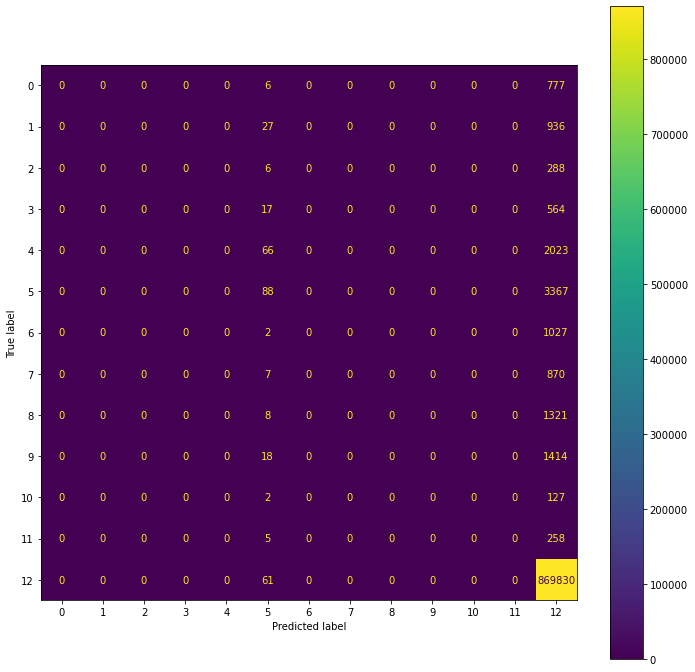

In [42]:
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)

In [ ]:
# # import tensorflow.keras.layers as kl

# # Créer un réseau à base de LSTM avec au minimum:
# # Embedding
# # Dropout
# # LSTM
# # Dropout
# # Classifieur
# model = tf.keras.models.Sequential()

# model.add(kl.Embedding(NUMWORDS, 30, input_length = MAXLEN))
# model.add(kl.Dropout(0.2))
# model.add(kl.Bidirectional(kl.LSTM(64)))
# model.add(kl.Dropout(0.2))
# model.add(kl.Dense(cat_vocab+1, activation="softmax"))

# # Compiler le modèle 

# model.compile(loss="sparse_categorical_crossentropy", 
#               optimizer="adam", 
#               metrics=['accuracy'])

# # Afficher le summary du modèle

# model.summary()

In [ ]:
# # Fitter le modèle
# model.fit( X_train_seq, Y_train_id, batch_size=128, epochs = 5)

In [ ]:
# # Evaluer le modèle
# model.evaluate(X_test_seq, Y_test_id)